In [1]:
%matplotlib inline

# common imports
import pandas as pd
from IPython.display import display
from __future__ import division
from pandas import read_excel
from pandas_datareader import data as web
import numpy as np
from numpy import log, exp, sqrt, nan, inf, diff, ones, zeros
from numpy.linalg import inv, svd
import scipy as sp
import math
import statsmodels.api as sm
from statsmodels.sandbox.regression import gmm
from statsmodels import tsa

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.dates import MonthLocator,DateFormatter
from mpl_toolkits.mplot3d import Axes3D
import seaborn.apionly as sns


# date related functions
import datetime as dt
from datetime import date, timedelta
from calendar import month_abbr

# this allows plots to appear directly in the notebook

#numpy settings
np.set_printoptions(precision=2)

# pandas settings
pd.set_option('precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


# figure configuration
fsize = (10,6) # figure size
tsize = 18 # title font size
lsize = 16 # legend font size
csize = 14 # comment font size
grid = True # grid

Automatically created module for IPython interactive environment


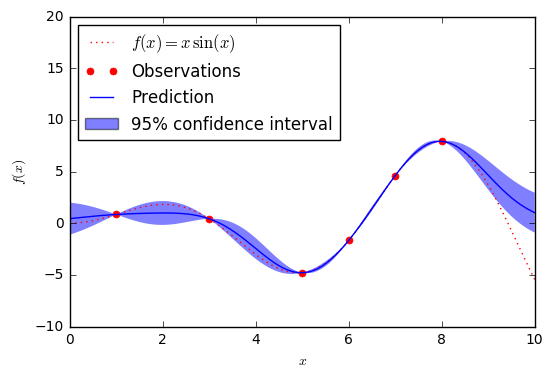

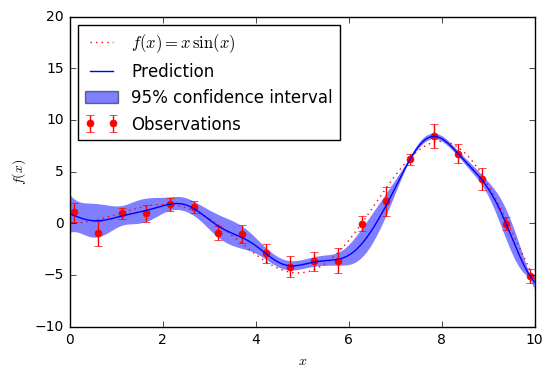

In [33]:
print(__doc__)

# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=None, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy / y) ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

In [25]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=None, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

In [27]:
y_pred

array([  4.40e-01,   4.44e-01,   4.49e-01,   4.54e-01,   4.58e-01,
         4.63e-01,   4.68e-01,   4.72e-01,   4.77e-01,   4.82e-01,
         4.86e-01,   4.91e-01,   4.96e-01,   5.00e-01,   5.05e-01,
         5.10e-01,   5.14e-01,   5.19e-01,   5.24e-01,   5.28e-01,
         5.33e-01,   5.38e-01,   5.42e-01,   5.47e-01,   5.52e-01,
         5.56e-01,   5.61e-01,   5.66e-01,   5.70e-01,   5.75e-01,
         5.79e-01,   5.84e-01,   5.88e-01,   5.93e-01,   5.98e-01,
         6.02e-01,   6.07e-01,   6.11e-01,   6.16e-01,   6.20e-01,
         6.24e-01,   6.29e-01,   6.33e-01,   6.38e-01,   6.42e-01,
         6.46e-01,   6.51e-01,   6.55e-01,   6.59e-01,   6.64e-01,
         6.68e-01,   6.72e-01,   6.76e-01,   6.80e-01,   6.84e-01,
         6.89e-01,   6.93e-01,   6.97e-01,   7.01e-01,   7.05e-01,
         7.09e-01,   7.13e-01,   7.17e-01,   7.20e-01,   7.24e-01,
         7.28e-01,   7.32e-01,   7.36e-01,   7.39e-01,   7.43e-01,
         7.47e-01,   7.50e-01,   7.54e-01,   7.58e-01,   7.61e